# Analisando a Felicidade com Projeção Multidimensional, Coordenadas Paralelas e Random Forest

As pontuações e classificações de felicidade usam dados da Pesquisa Mundial Gallup. Essa pesquisa solicita que os entrevistados pensem em uma escala onde a melhor vida possível corresponde a 10 e a pior vida possível a 0 e classifiquem suas próprias vidas atuais nessa escala. As pontuações são de amostras nacionalmente representativas para os anos 2015-2017 e usam os pesos Gallup para tornar as estimativas representativas. As colunas que seguem o índice de felicidade estimam até que ponto cada um dos seis fatores - produção econômica, suporte social, expectativa de vida, liberdade, ausência de corrupção e generosidade - contribui para tornar as avaliações de vida mais altas em cada país do que na Distopia. país hipotético que possui valores iguais às médias nacionais mais baixas do mundo para cada um dos seis fatores. Eles não têm impacto na pontuação total relatada para cada país, mas explicam por que alguns países têm uma classificação mais alta do que outros.

O que é distopia?

A distopia é um país imaginário que tem as pessoas menos felizes do mundo. O objetivo no estabelecimento da Distopia é ter uma referência com a qual todos os países possam ser comparados favoravelmente (nenhum país apresenta desempenho inferior ao da Distopia) em termos de cada uma das seis variáveis principais, permitindo assim que cada sub-barra tenha largura positiva. Os menores escores observados para as seis variáveis principais caracterizam, portanto, Distopia. Como a vida seria muito desagradável em um país com as menores rendas do mundo, menor expectativa de vida, menor generosidade, maior corrupção, menos liberdade e menos apoio social, é chamada de "Distopia", em contraste com a utopia.

#### Source: https://www.kaggle.com/unsdsn/world-happiness

## Dicionário dos Dados

- Economy: Score relacionado ao PIB Per Capita
- Family: Score relacionado a família
- Freedom: Score relacionado a liberdade
- Corruption: Score relacionado a confiança no governo
- Generosity: Score relacionado a generosidade
- Health: Score relacionado a expectativa de vida
- Happiness Score: Nota total
- Happiness Rank: Posição do país no rank

## Metodologia

Vamos analisar os dados em 3 Etapas:

- Etapa 1: Carregaremos os dados, e realizaremos modificações necessárias em sua extrutura para posterior análise.
- Etapa 2: Vamos realizar um plot de projeção multidimensional interativo.
- Etapa 3: Iremos realizar um plot de coordenadas paralelas.
- Etapa 4: Utilizaremos de Random Forest para realizar um Feature Selection, avaliando quais variáveis são mais importantes.
- Etapa 5: Aplicaremos um simples modelo de Regressão para tentar prever o Happiness Score com base nas outras variáveis.

### Etapa 1: Carregamento e análise dos dados

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.models import CategoricalColorMapper, ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_notebook
from bokeh.io import show, output_file
from bokeh.transform import factor_cmap
from sklearn import manifold
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
sns.set_palette("hls")
%matplotlib inline

In [2]:
data2015 = pd.read_csv('2015.csv')
data2016 = pd.read_csv('2016.csv')
data2017 = pd.read_csv('2017.csv')

In [3]:
data2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
data2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Podemos perceber que os dados possuem colunas diferentes e em posições diferentes. Vamos portanto, padronizar os datasets e uní-los em um só.

In [6]:
col=['Country','Region','HappinessRank', 'HappinessScore', 'Economy', 'Family', 'Health', 'Freedom', 'Corruption','Generosity','Dystopia','Year']

i=0
j=0

for i in range(data2017.shape[0]):
    
    for j in range(data2015.shape[0]):
    
        if (data2017.Country[i] == data2015.Country[j]):
    
            data2017['Region'] = data2015.Region

df2015=data2015.drop(['Standard Error'],axis=1)
df2016=data2016.drop(['Lower Confidence Interval','Upper Confidence Interval'],axis=1)
df2017=data2017.drop(['Whisker.high','Whisker.low'],axis=1)

df2015['Year']=2015
df2016['Year']=2016
df2017['Year']=2017

df2015.columns, df2016.columns=col,col

d2017=df2017[['Country', 'Region', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.','Generosity','Dystopia.Residual','Year']]
d2017.columns=col

data = pd.concat([df2015, df2016, d2017])


In [24]:
data.head()

,Country,Region,HappinessRank,HappinessScore,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Vamos verificar a presença de valores missing:

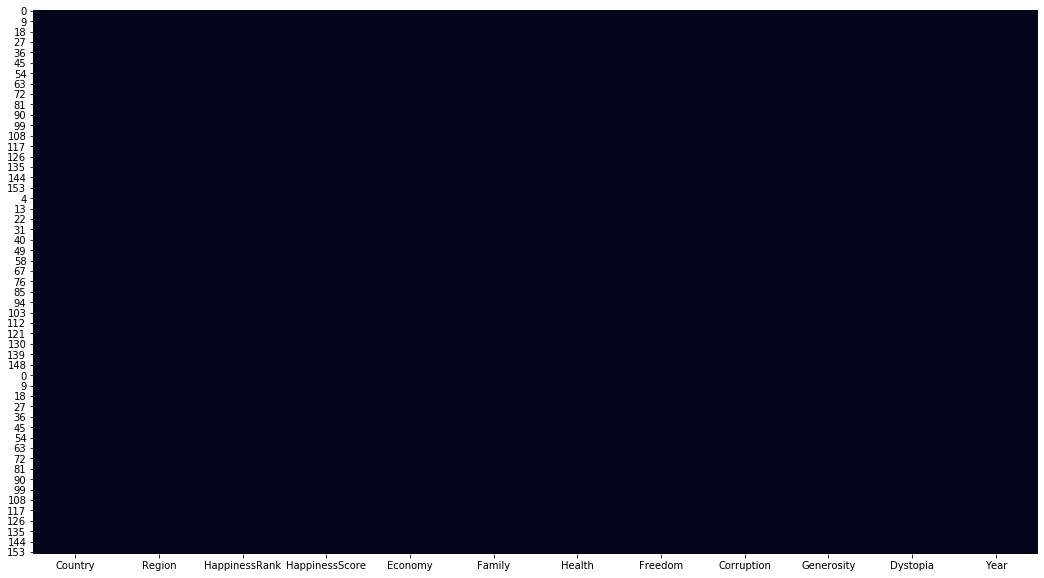

In [26]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.isnull(), cbar=False)

Em caso de valores missing, o gráfico mostraria barras brancas. Como não há, todo ele está da cor preta.

### Etapa 2: Criação de uma função que realiza uma projeção multidimensional e plota um gráfico interativo.

A projeção multidimensional é uma técnica capaz de simplificar um conjunto de dados, através de uma transformação que reduz as dimensões originais de um dataset, preservando a similaridade dos elementos. Cada linha do dataset será reduzida a um ponto, de forma que a visualização permita uma análise do padrão de similaridade entre grupos de elementos, como por exemplo: a densidade, o tamanho, fronteiras, outliers e distâncias. 

In [44]:
def projecaomultidimensional (ano):


    dataano=data[data['Year']==ano]

    mult=dataano[['HappinessRank', 'HappinessScore', 'Economy', 'Family', 'Health', 'Freedom', 'Corruption','Generosity','Dystopia']]

    # Normalizando os dados

    minmaxscaler = preprocessing.MinMaxScaler()

    datanormalizado = minmaxscaler.fit_transform(mult)

    dfnormalizado = pd.DataFrame(datanormalizado, columns=mult.columns)

    # Aplicando o manifold nos dados normalizados

    mani = manifold.MDS(random_state=25)

    df2dim = mani.fit_transform(dfnormalizado) 

    source = ColumnDataSource(data=dict(x=df2dim[:,0], y=df2dim[:,1], p=data2015.Country, c=dataano.Region, h=dataano.HappinessRank ))

    # Define a paleta de cores a ser aplicada nos pontos, de acordo com o continente

    mapper = factor_cmap('c', palette=['purple', 'red', 'blue', 'orange', 'green', 'black', 'yellow', 'brown','salmon'], factors=data2015.Region.unique().tolist())

    # Gera e exibe a figura da visualização

    p = figure(plot_width=900, plot_height=500, tools=[HoverTool(tooltips=[('Posição', '@h'), ('País', '@p'), ('Região', '@c')])], title='Projeção Multidimensional')

    p.circle('x', 'y', size=7, source=source,  legend='c', alpha=1, color=mapper)

    output_notebook()

    show(p)

In [45]:
projecaomultidimensional(2017)

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/bokeh/models/sources.py:175: BokehUserWarning:

ColumnDataSource's columns must be of the same length. Current lengths: ('c', 155), ('h', 155), ('p', 158), ('x', 155), ('y', 155)

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/bokeh/models/mappers.py:147: UserWarning:

Palette length does not match number of factors. ['Southern Asia'] will be assigned to `nan_color` gray

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead



Loading BokehJS ...

### Análise da projeção multidimensional

Investigando o gráfico acima, podemos notar como os países estão relacionados entre si. Percebe-se que na região superior esquerda, encontram-se países da 'Western Europe' e 'North America', enquando que na região inferior direita, notamos uma maior concentração de países da 'Sub-Saharan Africa'. Países da 'Latin America and Caribbean' estão localizados na região central, e alguns até possuem semelhanças com o grupo da 'Western Europe', como Chile e Brazil. No geral, países com alta pontuação encontram-se distribuídos na região superior esquerda, enquanto que os com baixa pontuação na região inferior direita.

### Etapa 3: Criação de uma função que realiza um plot de coordenadas paralelas.

O plot de coordenadas paralelas permite visualizar o comportamento de cada linha do gráfico passando por cada atributo (coluna), ou seja, no caso específico iremos analisar do ponto de vista da posição do ranking. Poderemos ver como os primeiros e últimos colocados se comportam para cada tipo de atributo.

In [57]:
def coordenadasparalelas (ano):
        
    dataano2=data[data['Year']==ano]
    
    mult2=dataano2[['HappinessRank', 'HappinessScore', 'Economy', 'Family', 'Health', 'Freedom', 'Corruption','Generosity','Dystopia']]

    minmaxscaler = preprocessing.MinMaxScaler()

    datanormalizado2 = minmaxscaler.fit_transform(mult2)

    dfnormalizado2 = pd.DataFrame(datanormalizado2, columns=mult2.columns)


    fig = px.parallel_coordinates(dfnormalizado2, color='HappinessRank', dimensions=['Economy', 'Family', 'Health', 'Freedom', 'Corruption','Generosity','Dystopia'], color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
    
    fig.show()


In [58]:
coordenadasparalelas(2017)

### Análise do Plot de Coordenadas Paralelas 

Podemos realizar uma análise do gráfico acima da seguinte maneira:
    
- As linhas verdes são as dos países que ocupam as primeiras posições do ranking, enquanto que as vermelhas, dos últimos.

- Podemos analisar que a economia é um fator importante, pois a densidade de linhas verdes (países mais felizes) encontram-se no topo (maior renda per capita) e dos países tristes encontram-se na parte inferior (pior renda per capita). 

- Outro fator determinante para a posição no ranking é o parâmetro Health, que indica a expectativa de vida. Países mais bem colocados possuem grande densidade no topo, enquanto os piores colocados, na parte inferior. 

### Etapa 4: Encontrando as variáveis que mais impactam no score utilizando de Random Forest
    
Vamos utilizar o algoritmo de machine learning Random Forest para verificar quais são os atributos mais importantes na pontuação geral do ranking.

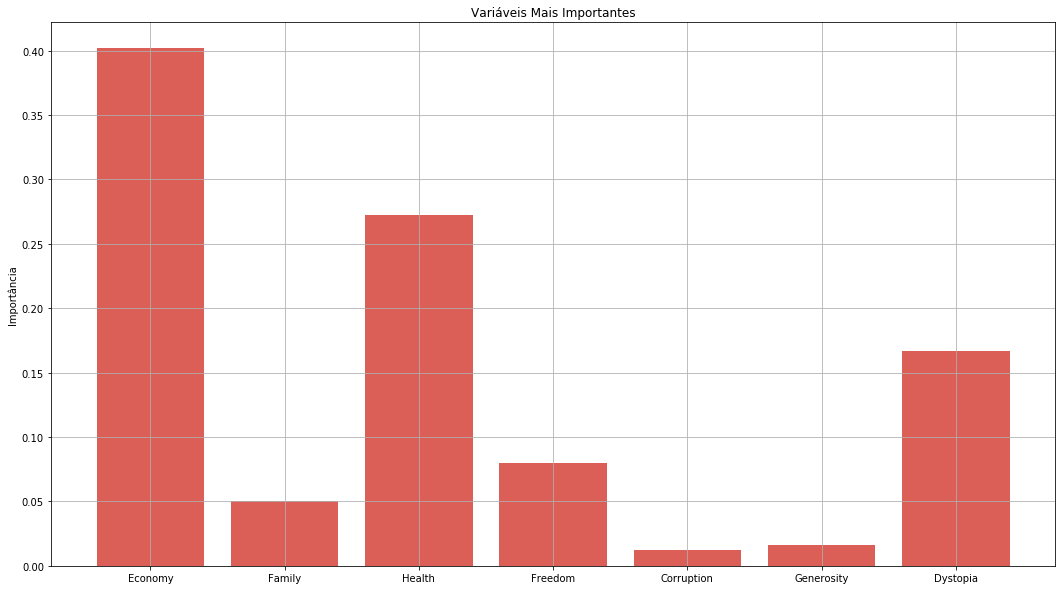

In [54]:
mult3=data[['HappinessRank', 'HappinessScore', 'Economy', 'Family', 'Health', 'Freedom', 'Corruption','Generosity','Dystopia']]

minmaxscaler = preprocessing.MinMaxScaler()
dtanormalizado = minmaxscaler.fit_transform(mult3)
dtnormalizado = pd.DataFrame(dtanormalizado, columns=mult3.columns)

clf = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)

clf.fit(dtnormalizado[['Economy', 'Family', 'Health', 'Freedom', 'Corruption','Generosity','Dystopia']], dtnormalizado['HappinessScore'])

importance = clf.feature_importances_

plt.figure(figsize=(18, 10))
plt.bar(['Economy', 'Family', 'Health', 'Freedom', 'Corruption','Generosity','Dystopia'],importance)
plt.grid()
plt.ylabel("Importância")
plt.title('Variáveis Mais Importantes')
plt.show()

## Análise do Feature Selection

O algoritmo de Random Forest concordou com nossa análise visual. Podemos notar que as variáveis mais importantes para o score geral são: Economy e Health. A terceira mais significante é o fator Dystopia.

### Etapa 5: Implementando uma Regressão Ridge para prever o Score com base nas variáveis Economy, Health, Freedom e Dystopia

In [60]:
Xtreino, Xteste, ytreino, yteste = train_test_split(dtnormalizado[['Economy','Health','Freedom','Dystopia']], dtnormalizado['HappinessScore'], test_size=0.5, random_state=42)


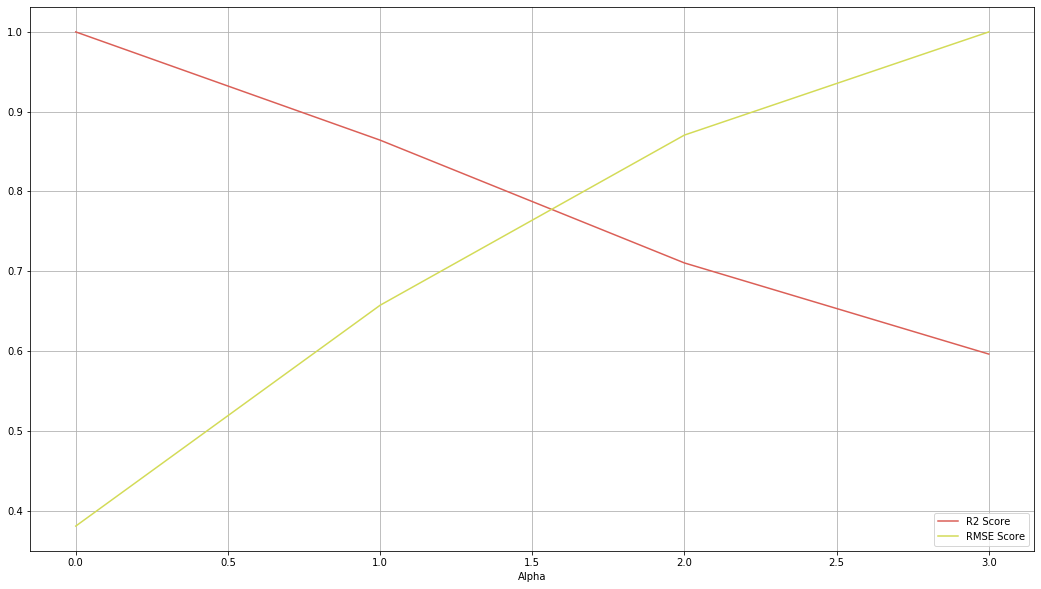

In [61]:
rmse2 = []

r2score = []

lista = np.arange(0,4,0.1).astype(int)  

for i in lista :
    ridgereg = Ridge(alpha=i, normalize=True)
    ridgereg.fit(Xtreino, ytreino)
    ypredridge = ridgereg.predict(Xteste)
    rmse2.append(sqrt(mean_squared_error(yteste,ypredridge)))
    r2score.append(r2_score(yteste,ypredridge))

plt.figure(figsize=(18,10))
plt.plot(lista,np.array(r2score)/max(r2score),label='R2 Score')
plt.plot(lista,np.array(rmse2)/max(rmse2), label=('RMSE Score'))
plt.grid()
plt.legend()
plt.xlabel('Alpha')
plt.show()


In [77]:
ridgereg = Ridge(alpha=1.58, normalize=True)
ridgereg.fit(Xtreino, ytreino)
ypredridge2 = ridgereg.predict(Xteste)

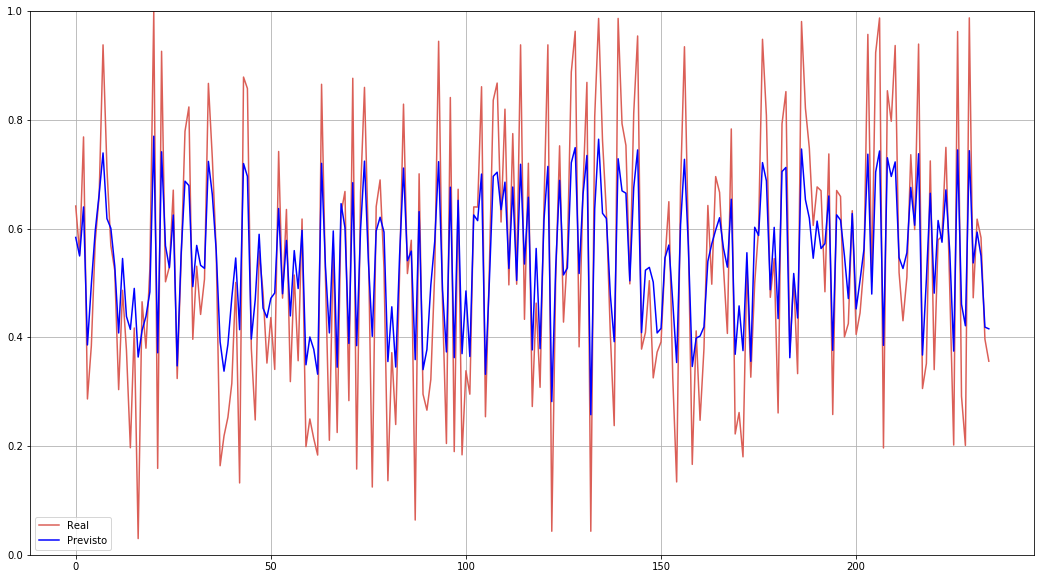

In [78]:
plt.figure(figsize=(18, 10))
plt.plot(range(0,len(yteste)),yteste, label='Real')
plt.plot(range(0,len(yteste)),ypredridge2,color='blue',label='Previsto')
plt.grid()
plt.ylim(0,1)
plt.legend()
plt.show()

### Resultados:

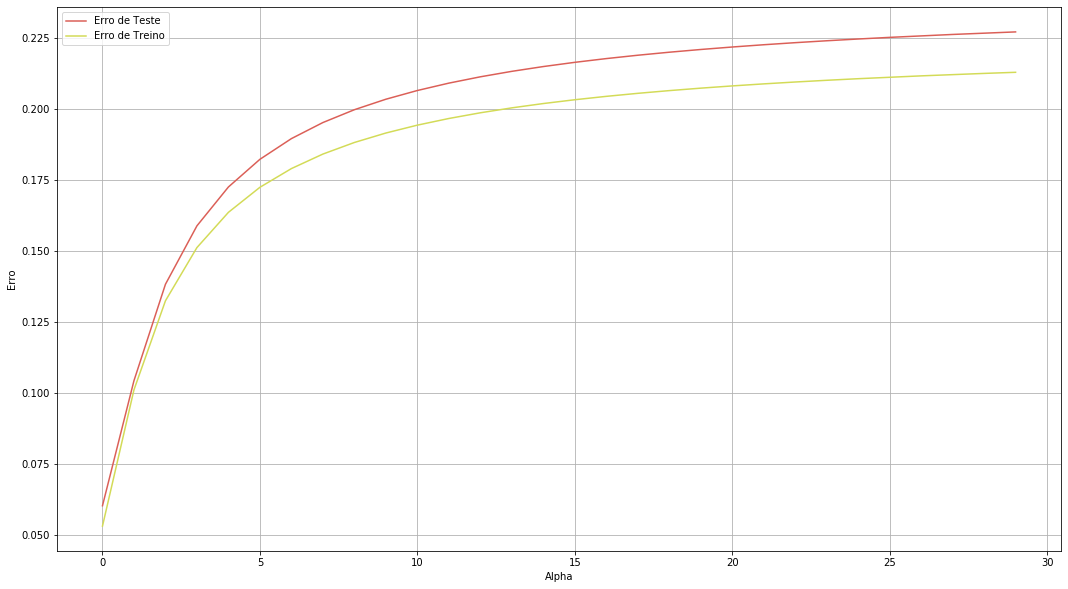

In [64]:
rmse2 = []
rmse3 = []

r2score2 = []

lista = np.arange(0,30,0.1).astype(int)  

for i in lista :
    ridgereg = Ridge(alpha=i, normalize=True)
    ridgereg.fit(Xtreino, ytreino)
    ypredridge = ridgereg.predict(Xteste)
    ypredridge2 = ridgereg.predict(Xtreino)
    rmse2.append(sqrt(mean_squared_error(yteste,ypredridge)))
    rmse3.append(sqrt(mean_squared_error(ytreino,ypredridge2)))
    
plt.figure(figsize=(18,10))
plt.plot(lista,rmse2, label='Erro de Teste')
plt.plot(lista,rmse3, label=('Erro de Treino'))
plt.grid()
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Erro')
plt.show()


In [69]:
print("Mean Squared Error: ", mean_squared_error(yteste,ypredridge2)) 
print("Root Mean Squared Error: ", sqrt(mean_squared_error(yteste,ypredridge2))) 

Mean Squared Error:  0.11211852105824535
Root Mean Squared Error:  0.33484103849176755
